# Analisi esplorativa dei dati con *pandas*

## Caricamento dei dati

I file CSV possono essere ottenuti facilmente come export da qualsiasi ambiente e possono essere caricati facilmente in pandas.<br>
Anche SQLite 3 fornisce il modo per esportare una tabella nel formato csv. Vedi [questa chat](https://chatgpt.com/share/68494b60-2768-8012-9010-f0bd5dc434d9).

In [1]:
import pandas as pd

In [2]:
pd.read_csv("export.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'export.csv'

Ora carichiamo il file CSV `CreditISLR` (un famoso dataset bancario costruito negli anni '90 da un professore universitario tedesco) in un dataframe pandas con tre errori voluti (tipici):

In [3]:
df = pd.read_csv("CreditISLR.csv")    # il nome file è sbagliato

FileNotFoundError: [Errno 2] No such file or directory: 'CreditISLR.csv'

Verifichiamo la directory corrente con il comando magic `%pwd`

In [4]:
%pwd

'C:\\Users\\Utente\\Desktop\\salvataggi\\SALVATAGGIO DATI\\Documents\\Seminari\\Data Science (corsi)\\Corso ML con Python (Overnet - Aresys)\\Corso Python base'

Verifichiamo i contenuti di questa directory con un altro comando magic:

In [5]:
%ls

 Il volume nell'unità C è OS
 Numero di serie del volume: 7E81-0BB8

 Directory di C:\Users\Utente\Desktop\salvataggi\SALVATAGGIO DATI\Documents\Seminari\Data Science (corsi)\Corso ML con Python (Overnet - Aresys)\Corso Python base

13/06/2025  23:58    <DIR>          .
13/06/2025  23:58    <DIR>          ..
11/06/2025  23:14    <DIR>          .ipynb_checkpoints
03/03/2024  23:59           329.941 7 uses of underscore in python.pdf
26/06/2024  19:13         2.552.334 A Misconception About Pandas Inplace - by Avi Chawla.pdf
21/05/2025  00:21            40.638 compilation_python_1.png
21/05/2025  00:21            27.297 compilation_python_2.png
21/05/2025  00:22            12.079 compilation_python_3.png
14/05/2021  12:37         2.939.021 CvsPythonMemoryAllocation.png
05/04/2024  09:40            74.934 df_vs_array.png
22/05/2025  13:10            29.996 DriveLab.png
22/05/2025  20:44               517 esempio_testo.txt
26/12/2023  01:19           317.894 how_python_works.png
26/06/2024

In [6]:
df = pd.read_csv("CreditISLR")        # manca il tipo file (.csv)

FileNotFoundError: [Errno 2] No such file or directory: 'CreditISLR'

Il terzo errore tipico è che il file NON è presente nella directory. Qui è presente!<br>
Il quarto errore tipico è omettere:
- il separatore usato nel file csv (`sep`) - in genere ma non sempre è la virgola (il default di `sep`), a volte è il punto e virgola, ed allora dobbiamo usare `sep=";"`
- oppure il booleano delle intestazioni (`header=None`) se il file csv NON contiene la prima riga delle intestazioni.

Per esemplificare questa situazione usiamo un file CSV che NON ha la riga di intestazioni:

In [9]:
nomi_colonne = ['Unnamed: 0','ID','Income','Limit','Rating','Cards','Age','Education','Gender','Student','Married','Ethnicity','Balance']
df = pd.read_csv("Credit_ISLR_no_header.csv", sep=",", header=None, names = nomi_colonne)

In [10]:
df

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,"1,1,14.891,3606,283,2,34,11,"" Male"",""No"",""Yes""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2,2,106.025,6645,483,3,82,15,""Female"",""Yes"",""Y...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"3,3,104.593,7075,514,4,71,11,"" Male"",""No"",""No""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"4,4,148.924,9504,681,3,36,11,""Female"",""No"",""No...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"5,5,55.882,4897,357,2,68,16,"" Male"",""No"",""Yes""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,"396,396,12.096,4100,307,3,32,13,"" Male"",""No"",""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,"397,397,13.364,3838,296,5,65,17,"" Male"",""No"",""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,"398,398,57.872,4171,321,5,67,12,""Female"",""No"",...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,"399,399,37.728,2525,192,1,44,13,"" Male"",""No"",""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Per finire, la lettura corretta:

In [11]:
df = pd.read_csv("Credit_ISLR.csv")

In [12]:
type(df)   # la classe dell'oggetto

pandas.core.frame.DataFrame

Le prime due colonne sono inutili e ridondanti e le possiamo eliminare con il metodo `drop` di *pandas* (il parametro `inplace` ha default `False`, se impostato a `True` la modifica alla struttura del database è definitiva (in memoria!!!)

In [13]:
df.drop(columns=['Unnamed: 0','ID'], inplace=True)

In [14]:
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


## Analisi esplorativa del dataset

In [15]:
df.head()       # le prime n righe (n=5 per default)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [16]:
df.tail()        # le ultime n righe (n=5 per default)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,18.701,5524,415,5,64,7,Female,No,No,Asian,966


Nella Data Science i dataset devono essere è [*tidy*](https://it.statisticseasily.com/glossario/cos%27%C3%A8-la-comprensione-dei-dati-ordinati-organizzazione-dei-dati/). Cioè: 
- i clienti sono sulle righe e le colonne sono le loro caratteristiche
- non ci sono celle multi-valore (vedi un  esempio di cella multi-valore [qui](https://forum.knime.com/t/lookup-and-return-multiple-values-in-one-cell/65178))

*CreditISLR* è tidy.

In [17]:
df.T    # dataset non tidy, non adatto alla Data Science

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Income,14.891,106.025,104.593,148.924,55.882,80.18,20.996,71.408,15.125,71.061,...,135.118,73.327,25.974,17.316,49.794,12.096,13.364,57.872,37.728,18.701
Limit,3606,6645,7075,9504,4897,8047,3388,7114,3300,6819,...,10578,6555,2308,1335,5758,4100,3838,4171,2525,5524
Rating,283,483,514,681,357,569,259,512,266,491,...,747,472,196,138,410,307,296,321,192,415
Cards,2,3,4,3,2,4,2,2,5,3,...,3,2,2,2,4,3,5,5,1,5
Age,34,82,71,36,68,77,37,87,66,41,...,81,43,24,65,40,32,65,67,44,64
Education,11,15,11,11,16,10,12,9,13,19,...,15,15,10,13,8,13,17,12,13,7
Gender,Male,Female,Male,Female,Male,Male,Female,Male,Female,Female,...,Female,Female,Male,Male,Male,Male,Male,Female,Male,Female
Student,No,Yes,No,No,No,No,No,No,No,Yes,...,No,No,No,No,No,No,No,No,No,No
Married,Yes,Yes,No,No,Yes,No,No,No,No,Yes,...,Yes,No,No,No,No,Yes,No,Yes,Yes,No
Ethnicity,Caucasian,Asian,Asian,Asian,Caucasian,Caucasian,African American,Asian,Caucasian,African American,...,Asian,Caucasian,Asian,African American,Caucasian,Caucasian,African American,Caucasian,Caucasian,Asian


In [18]:
# subsetting
display(df[:5])                # le prime 5 righe
display(df[5:])                # dalla riga 6 in poi

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [21]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 100)
display(df[350:])                # dalla riga 350 in poi

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
350,30.002,1561,155,4,70,13,Female,No,Yes,Caucasian,0
351,61.620,5140,374,1,71,9,Male,No,Yes,Caucasian,302
352,104.483,7140,507,2,41,14,Male,No,Yes,African American,583
353,41.868,4716,342,2,47,18,Male,No,No,Caucasian,425
354,12.068,3873,292,1,44,18,Female,No,Yes,Asian,413
355,180.682,11966,832,2,58,8,Female,No,Yes,African American,1405
356,34.480,6090,442,3,36,14,Male,No,No,Caucasian,962
357,39.609,2539,188,1,40,14,Male,No,Yes,Asian,0
358,30.111,4336,339,1,81,18,Male,No,Yes,Caucasian,347
359,12.335,4471,344,3,79,12,Male,No,Yes,African American,611


In [72]:
pd.reset_option('display.max_rows', 5)
pd.set_option('display.width', 5)

In [50]:
df.info()      # fornisce parecchie info sul dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [73]:
n=20
df.sample(n, random_state=10)     # seme = 10 (o qualsiasi altro valore numerico)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
332,62.328,5228,377,3,83,15,Male,No,No,Caucasian,380
111,28.575,2959,231,2,60,11,Female,No,No,African American,0
352,104.483,7140,507,2,41,14,Male,No,Yes,African American,583
205,10.793,3878,321,8,29,13,Male,No,No,Caucasian,638
56,57.100,4742,372,7,79,18,Female,No,Yes,Asian,379
379,53.308,2860,214,1,84,10,Male,No,Yes,Caucasian,0
81,53.480,4263,317,1,83,15,Male,No,No,Caucasian,99
214,34.909,5289,410,2,62,16,Female,No,Yes,Caucasian,681
142,103.893,7416,549,3,84,17,Male,No,No,Asian,669
110,34.537,3271,250,3,57,17,Female,No,Yes,Asian,47


> Ogni volta che chiamiamo una funzione o un metodo che al suo interno ha un funzionamento casuale, possiamo RIPRODURRE ogni volta lo stesso comportamento casuale **impostando un seme**. 

In [74]:
df.isna()    # per controllare la presenza di valori mancanti nel dataset (na = not available)
             # questo metodo esegue un check booleano per ogni cella del dataframe: FALSE se la cella è valorizzata, 
             # TRUE se il valore della cella è assente
             # l'output di questo metodo è una matrice booleana TRUE/FALSE

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


In [75]:
import numpy as np          # un package che fornisce la funzione 'sum' (somma)
np.sum(df.isna(),axis=0)    # nei linguaggi di programmazione TRUE è memorizzato come 1 e FALSE come 0.
                            # axis = 0 --> la funzione 'sum' somma sulle colonne della matrice booleana

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [76]:
np.sum(df['Income'].isna(),axis=0)     # subsetting, cioè estrarre un sottoinsieme di righe e/o di colonne dal dataframe

0

In [77]:
df.columns      # i nomi delle colonne del dataframe:è un oggetto index (scomodo)

Index(['Income',
       'Limit',
       'Rating',
       'Cards',
       'Age',
       'Education',
       'Gender',
       'Student',
       'Married',
       'Ethnicity',
       'Balance'],
      dtype='object')

In [78]:
list(df.columns) # trasformato in una lista 

['Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Education',
 'Gender',
 'Student',
 'Married',
 'Ethnicity',
 'Balance']

In [79]:
df.shape        # fornisce le dimensioni del dataframe

(400, 11)

In [80]:
df.shape[0]     # fornisce solo il numero di righe

400

In [81]:
df.size         # il numero totale delle celle del dataframe (il numero righe numero colonne

4400

In [82]:
df.dtypes       # gli 'bject' in pandas sono le stringhe alfanumeriche 

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [83]:
df.describe()   # le principali statistiche delle colonne numeriche

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [84]:
round(df.describe(),2)     # per eliminare le cifre decimali dalla terza in poi

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,45.22,4735.60,354.94,2.96,55.67,13.45,520.02
std,35.24,2308.20,154.72,1.37,17.25,3.13,459.76
min,10.35,855.00,93.00,1.00,23.00,5.00,0.00
25%,21.01,3088.00,247.25,2.00,41.75,11.00,68.75
50%,33.12,4622.50,344.00,3.00,56.00,14.00,459.50
75%,57.47,5872.75,437.25,4.00,70.00,16.00,863.00
max,186.63,13913.00,982.00,9.00,98.00,20.00,1999.00


In [85]:
display(df)         # per visualizzare un oggetto anche in celle di codice con diversi output

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [86]:
df.select_dtypes('number')    # visualizza solo le colonne NUMERICHE

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331
...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560
396,13.364,3838,296,5,65,17,480
397,57.872,4171,321,5,67,12,138
398,37.728,2525,192,1,44,13,0


In [87]:
df.select_dtypes('object')    # visualizza solo le colonne ALFANUMERICHE

,Gender,Student,Married,Ethnicity
0,Male,No,Yes,Caucasian
1,Female,Yes,Yes,Asian
2,Male,No,No,Asian
3,Female,No,No,Asian
4,Male,No,Yes,Caucasian
...,...,...,...,...
395,Male,No,Yes,Caucasian
396,Male,No,No,African American
397,Female,No,Yes,Caucasian
398,Male,No,Yes,Caucasian


In [88]:
list(df['Ethnicity'].unique())   # la lista dei valori UNICI (utile per variabili alfanumeriche che hanno POCHI valori unici)

['Caucasian', 'Asian', 'African American']

In [89]:
df['Ethnicity'].value_counts()   # le frequenze (per una SPECIFICA colonna)

Ethnicity
Caucasian           199
Asian               102
African American     99
Name: count, dtype: int64

In [90]:
pd.crosstab(index=df['Ethnicity'],columns=df['Age'])

Age,23,24,25,26,27,28,29,30,31,32,...,81,82,83,84,85,86,87,89,91,98
Ethnicity,,,,,,,,,,,,,,,,,,,,,
African American,0,0,2,1,1,2,0,1,1,2,...,4,0,2,1,0,0,1,1,1,0
Asian,0,2,2,0,0,2,2,2,0,1,...,2,1,1,1,0,0,1,0,0,0
Caucasian,1,1,3,0,1,1,3,5,2,5,...,4,4,3,3,1,1,0,0,0,1


In [69]:
!conda install Jinja2 -y

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [92]:
df.select_dtypes('number').style.map(lambda v: 'color: red' if v < 10 else '')     # 'map' applica una funzione lambda

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891000,3606,283,2,34,11,333
1,106.025000,6645,483,3,82,15,903
2,104.593000,7075,514,4,71,11,580
3,148.924000,9504,681,3,36,11,964
4,55.882000,4897,357,2,68,16,331
5,80.180000,8047,569,4,77,10,1151
6,20.996000,3388,259,2,37,12,203
7,71.408000,7114,512,2,87,9,872
8,15.125000,3300,266,5,66,13,279
9,71.061000,6819,491,3,41,19,1350


All'inizio avevamo letto il file CSV con la funzione pandas `pd.read_csv`. Ora vogliamo salvare il nostro dataframe **su disco**.<br>
Non confondere la "persistenza" (un termine della OOP per intendere "salvataggio"):
- in memoria, tramite il parametro `inplace = True` fornito da alcuni metodi
- su disco, tramite un set di metodi della forma `to_XXX`

In [93]:
display(df.select_dtypes('number').style.bar(color='lightblue'))
display(df.select_dtypes('number').style.bar(color='#d65f5f'))

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891000,3606,283,2,34,11,333
1,106.025000,6645,483,3,82,15,903
2,104.593000,7075,514,4,71,11,580
3,148.924000,9504,681,3,36,11,964
4,55.882000,4897,357,2,68,16,331
5,80.180000,8047,569,4,77,10,1151
6,20.996000,3388,259,2,37,12,203
7,71.408000,7114,512,2,87,9,872
8,15.125000,3300,266,5,66,13,279
9,71.061000,6819,491,3,41,19,1350


,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891000,3606,283,2,34,11,333
1,106.025000,6645,483,3,82,15,903
2,104.593000,7075,514,4,71,11,580
3,148.924000,9504,681,3,36,11,964
4,55.882000,4897,357,2,68,16,331
5,80.180000,8047,569,4,77,10,1151
6,20.996000,3388,259,2,37,12,203
7,71.408000,7114,512,2,87,9,872
8,15.125000,3300,266,5,66,13,279
9,71.061000,6819,491,3,41,19,1350


In [94]:
df.to_csv('df.csv')

In [95]:
%ls

 Il volume nell'unità C è OS
 Numero di serie del volume: 7E81-0BB8

 Directory di C:\Users\Utente\Desktop\salvataggi\SALVATAGGIO DATI\Documents\Seminari\Data Science (corsi)\Corso ML con Python (Overnet - Aresys)\Corso Python base

15/06/2025  22:11    <DIR>          .
15/06/2025  22:11    <DIR>          ..
11/06/2025  23:14    <DIR>          .ipynb_checkpoints
03/03/2024  23:59           329.941 7 uses of underscore in python.pdf
26/06/2024  19:13         2.552.334 A Misconception About Pandas Inplace - by Avi Chawla.pdf
21/05/2025  00:21            40.638 compilation_python_1.png
21/05/2025  00:21            27.297 compilation_python_2.png
21/05/2025  00:22            12.079 compilation_python_3.png
22/04/2024  10:35            28.082 Credit_ISLR.csv
15/06/2025  22:01            31.170 Credit_ISLR_no_header.csv
14/05/2021  12:37         2.939.021 CvsPythonMemoryAllocation.png
15/06/2025  22:11            22.563 df.csv
05/04/2024  09:40            74.934 df_vs_array.png
22/05/2025  1

## Le serie

In pandas esistono anche le serie, costituite da una singola colonna di un certo data type elementare:

In [96]:
s = pd.Series([10, 20, 30])
s

0    10
1    20
2    30
dtype: int64

In [97]:
type(s)

pandas.core.series.Series

In [98]:
# subsetting
s[0]

10

In [99]:
# alcuni metodi dei dataframe sono disponibili anche per le serie
s.describe()

count     3.0
mean     20.0
std      10.0
min      10.0
25%      15.0
50%      20.0
75%      25.0
max      30.0
dtype: float64

In [100]:
s.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3 entries, 0 to 2
Series name: None
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 156.0 bytes


In [101]:
s.shape

(3,)

In [102]:
s.head(2)

0    10
1    20
dtype: int64

In [103]:
s.tail(2)

1    20
2    30
dtype: int64

## La standardizzazione dei dati
Diverse funzioni e metodi pandas devono lavorare su dati standardizzati, cioè centrati e riscalati.<br>
I dati standardizzati perdono il loro significato originale ma sono confrontabili.<br>
Occorre avere installato sul PC o sulla macchina virtuale la libreria `scikit-learn`. Si può controllare da un terminale Anaconda con il comando `conda list` che elenca tutti i package / librerie installati 8con pip o conda):

In [104]:
# A maggio 2025 l'ultima è la 1.6.1. 
import sklearn
print(sklearn.__version__) 

1.6.1


In [105]:
from sklearn import preprocessing  # un package specifico per la pre-elaborazione

In [106]:
std_array = preprocessing.scale(df.select_dtypes('number'))
                                           # la funzione 'scale' fa SIA centering CHE rescaling;
                                           # notare i 3 booleani a True per default.
                                           # usa uno stimatore BIASED della dev.std. Dall'help in linea, infatti:
                                           # "We use a biased estimator for the standard deviation, equivalent to
                                           # 'numpy.std(x, ddof=0). Note that the choice of 'ddof' is unlikely to
                                           # affect model performance."
                                           # la funzione 'scale' NON ha l'argomento 'ddof'!
            
display(std_array)                         # --> standardizzare significa prendere le SD come unità di misura.

array([[-0.86158299, -0.48999879, -0.46553881, ..., -1.2576741 ,
        -0.78492991, -0.40727698],
       [ 1.72743711,  0.82826106,  0.82870309, ...,  1.5284506 ,
         0.49658831,  0.83405596],
       [ 1.68675551,  1.01478681,  1.02931059, ...,  0.88996369,
        -0.78492991,  0.13063396],
       ...,
       [ 0.35946155, -0.24491264, -0.21963285, ...,  0.65778663,
        -0.46455035, -0.83194351],
       [-0.21280808, -0.95891584, -1.05441888, ..., -0.67723146,
        -0.1441708 , -1.13247675],
       [-0.75334493,  0.34199278,  0.38866085, ...,  0.48365384,
        -2.06644812,  0.97125591]])

In [107]:
# check di un elemento (il primo della colonna 'Income':
(14.891 - df['Income'].mean())/ df['Income'].std()

-0.8605053325388764

Molte elaborazioni in pandas restituiscono a numpy array anche se l'input era un dataframe.
Dobbiamo convertire l'array numpy in un dataframe pandas

In [108]:
variabili = ['Income','Limit','Rating','Cards','Age','Education','Balance']
variabili   #le colonne numeriche da standardizzare

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']

In [109]:
std_df = pd.DataFrame(std_array,columns=variabili)  # per rimettere le colonne nel dataframe usiamo il parametro 'columns'
std_df

,Income,Limit,Rating,Cards,Age,Education,Balance
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,-0.407277
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,0.834056
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,0.130634
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,0.966900
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,-0.411633
...,...,...,...,...,...,...,...
395,-0.940986,-0.275711,-0.310230,0.031032,-1.373763,-0.144171,0.087078
396,-0.904963,-0.389362,-0.381413,1.491355,0.541698,1.137347,-0.087144
397,0.359462,-0.244913,-0.219633,1.491355,0.657787,-0.464550,-0.831944
398,-0.212808,-0.958916,-1.054419,-1.429291,-0.677231,-0.144171,-1.132477


A cosa servono i dati standardizzati? Ad esempio per poterli confrontare con un boxplot multiplo.<br>
Vediamo prima a single boxplot.

<Axes: >

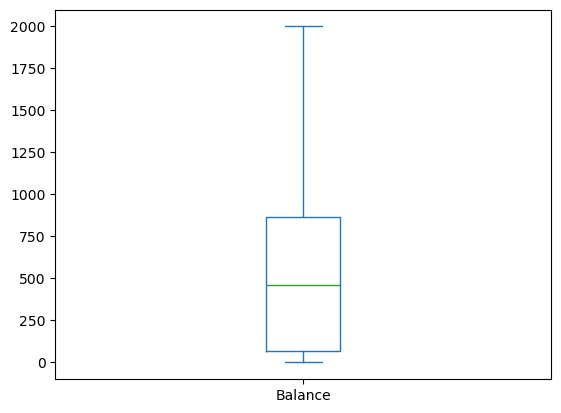

In [110]:
df['Balance'].plot.box()        # il boxplot della colonna 'Balance'

Il boxplot è la rappresentazione grafica del metodo `describe()`

In [111]:
df['Balance'].describe()

count     400.000000
mean      520.015000
std       459.758877
min         0.000000
25%        68.750000
50%       459.500000
75%       863.000000
max      1999.000000
Name: Balance, dtype: float64

Ora che abbiamo capito cosa è un boxplot, plottiamo un boxplot multiplo, cioè su tutte le colonne (numeriche) del dataframe, fianco a fianco:

<Axes: >

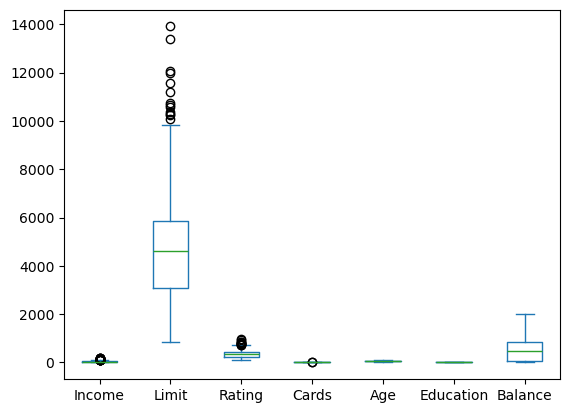

In [112]:
df.select_dtypes('number').plot.box()

In [113]:
df.select_dtypes('number').describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


<Axes: >

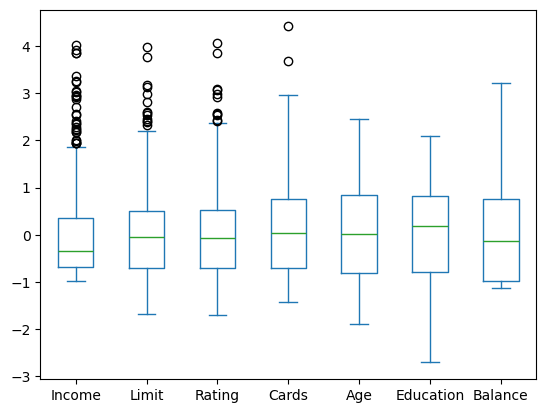

In [114]:
std_df.plot.box()

## Correlazione
La correlazione, un numero tra 0 ed 1 (se correlazione positiva) oppure tra 0 e -1 (se correlazione negativa), misura quanto due colonne numeriche del dataframe sono tra loro correlate, 
- cioè se al crescere / diminuire di una, l'altra anche cresce / diminuisce (correlazione positive)
- esempio di correlazione positiva: prezzo e mq di un alloggio
- oppure se al crescere di una, l'altra diminuisce oppure l'opposto (correlazione negativa)
- esempio di correlazione negativa: prezzo e km di un'auto usata

La correlazione può essere calcolata anche sui dati NON standardizzati.

In [115]:
df.select_dtypes('number').corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


In [116]:
df.corr(numeric_only=True)    # la stessa cosa

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


La precedente matrice ha TROPPA informazione. Dobbiamo semplificarla in due modi
- estranedo la matrice triangolare superiore (identica a quella inferiore, ma rovesciata)
- arrotondamento

In [117]:
corr_matrix = df.corr(numeric_only=True)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

display(round(upper_tri,2))

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,NaN,0.79,0.79,-0.02,0.18,-0.03,0.46
Limit,NaN,NaN,1.00,0.01,0.10,-0.02,0.86
Rating,NaN,NaN,NaN,0.05,0.10,-0.03,0.86
Cards,NaN,NaN,NaN,NaN,0.04,-0.05,0.09
Age,NaN,NaN,NaN,NaN,NaN,0.00,0.00
Education,NaN,NaN,NaN,NaN,NaN,NaN,-0.01
Balance,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Come regola pratica, le correlazioni > |0.7| sono interessanti. Non considerare le altre correlazioni, sono solo casualità (cioè esse dipendono da questo dataset)

## Plot

Uno dei plot più comuni è il grafico a dispersione (*scatter plot*) di due colonne:

<Axes: xlabel='Income', ylabel='Balance'>

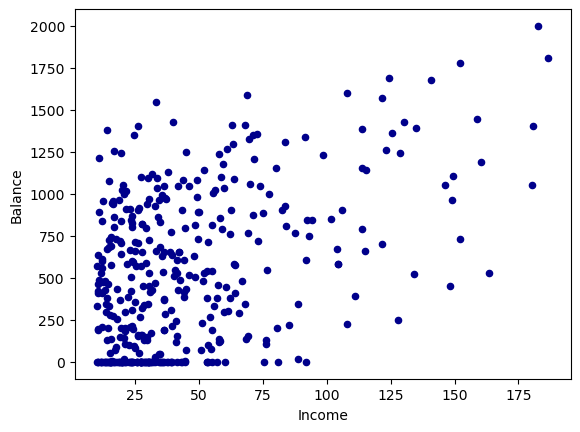

In [118]:
df.plot.scatter(x='Income',
                      y='Balance',
                      c='DarkBlue')

Vediamo la versione interattiva del plot, molto più comoda:

In [119]:
!conda install -y altair

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [120]:
import altair as alt
source = df    # 'source' è un comodo (per non rischiare di alterare 'df')

alt.Chart(source).mark_circle(size=60).encode(
    x='Income',
    y='Balance',
    color='Gender',
    tooltip=['Income', 'Balance', 'Age', 'Limit', 'Rating', 'Cards', 'Education']
).properties(
    width=800,   # oppure qualsiasi dimensione tu voglia
    height=600
).interactive()


alt.Chart(...)

Questo è lo scatterplot di UNA coppia di variabili. Per vedere tutti gli scatterplot dobbiamo plottare la *scatterplot matrix*:

array([[<Axes: xlabel='Income', ylabel='Income'>,
        <Axes: xlabel='Limit', ylabel='Income'>,
        <Axes: xlabel='Rating', ylabel='Income'>,
        <Axes: xlabel='Cards', ylabel='Income'>,
        <Axes: xlabel='Age', ylabel='Income'>,
        <Axes: xlabel='Education', ylabel='Income'>,
        <Axes: xlabel='Balance', ylabel='Income'>],
       [<Axes: xlabel='Income', ylabel='Limit'>,
        <Axes: xlabel='Limit', ylabel='Limit'>,
        <Axes: xlabel='Rating', ylabel='Limit'>,
        <Axes: xlabel='Cards', ylabel='Limit'>,
        <Axes: xlabel='Age', ylabel='Limit'>,
        <Axes: xlabel='Education', ylabel='Limit'>,
        <Axes: xlabel='Balance', ylabel='Limit'>],
       [<Axes: xlabel='Income', ylabel='Rating'>,
        <Axes: xlabel='Limit', ylabel='Rating'>,
        <Axes: xlabel='Rating', ylabel='Rating'>,
        <Axes: xlabel='Cards', ylabel='Rating'>,
        <Axes: xlabel='Age', ylabel='Rating'>,
        <Axes: xlabel='Education', ylabel='Rating'>,
        <

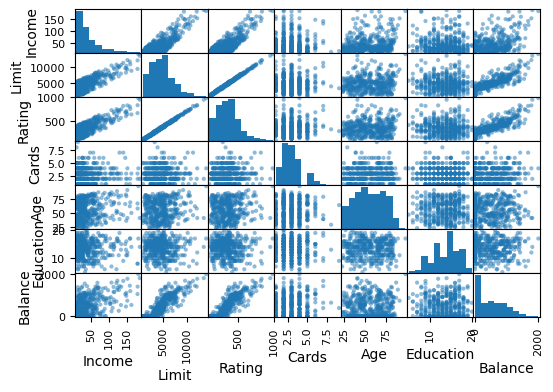

In [121]:
pd.plotting.scatter_matrix(df, figsize=(6,4))

Questa matrice di scatterplot è molto utile (SE le colonne NON sono troppe) per verificare facilmente ed in modo quasi automatico 2 cose:
- sono presenti outlier?
- ci sono trend tra le variabili?

<Axes: >

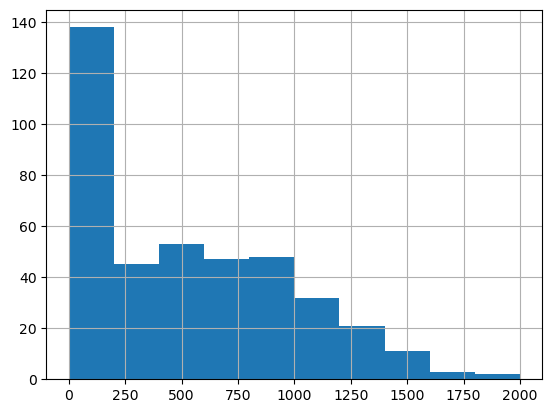

In [122]:
df['Balance'].hist()

In generale, i dati economici della clientela 'retail' come reddito, saldo, fatturato dei singoli clienti hanno una distribuzione fortemente assimmetrica (*skewed distribution*).<br>
Non la stessa cosa, in genere, per i dati socio-demografici.

<Axes: >

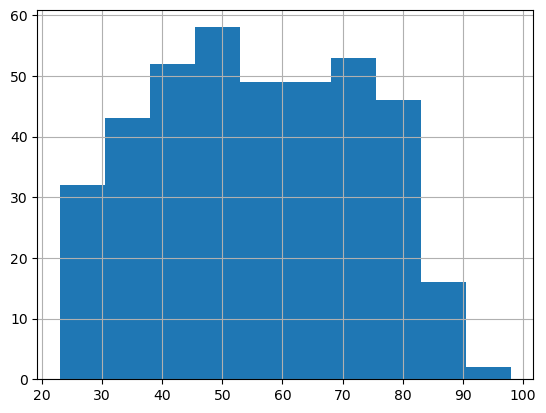

In [123]:
df['Age'].hist(bins=10)

<u>Quanti bins</u> dobbiamo chiedere? Due regole:
* da **5 a 20** (MAI BIN VUOTI): prof. Brandimarte (PoliTO)
* **1 + (10/3*log10(n))** (con n=num. osservazioni): prof.ssa Vicario (PoliTO) --> con n= 400 --> 1 + (10/3 * 3) = 10.

In [124]:
n = df.shape[0]
1 + ((10/3) * np.log10(n))

9.673533304426542

<Axes: >

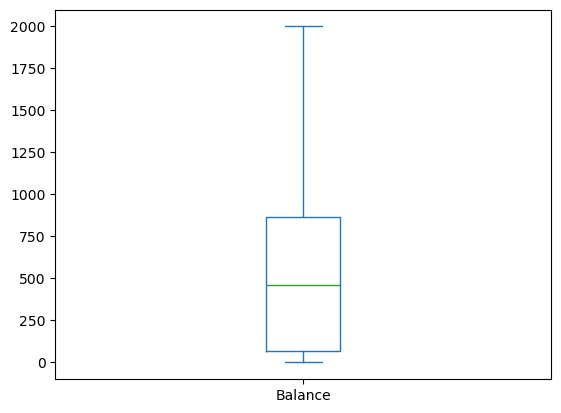

In [125]:
df['Balance'].plot.box()        # il boxplot della colonna 'Balance'

<Axes: >

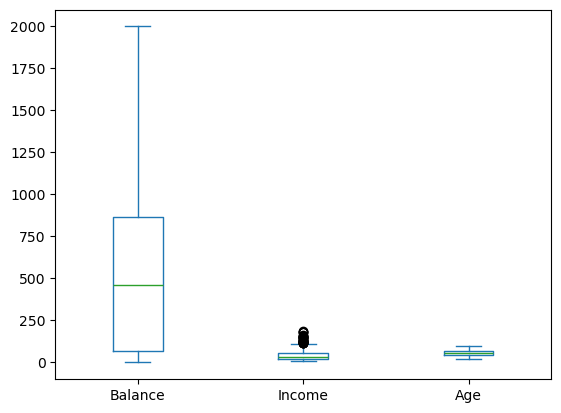

In [126]:
df[['Balance','Income','Age']].plot.box()        # il boxplot della colonna 'Balance'

<Axes: ylabel='count'>

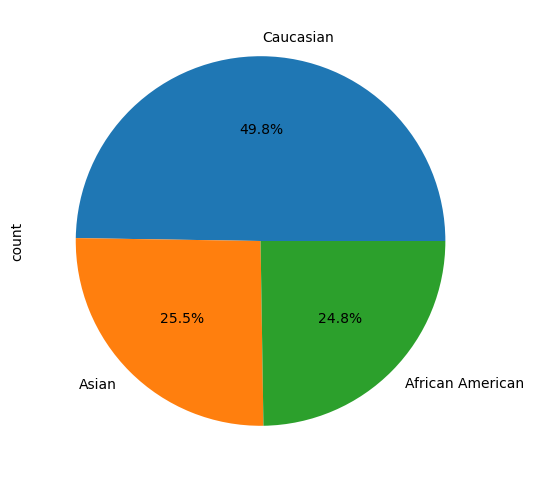

In [127]:
df['Ethnicity'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))

# Profiling automatico

In [128]:
!pip install summarytools --user


[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [129]:
from summarytools import dfSummary

In [130]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Income[float64],Mean (sd) : 45.2 (35.2)min < med < max:10.4 < 33.1 < 186.6IQR (CV) : 36.5 (1.3),399 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAqpJREFUeJzt3DFv2kAYgOHvgKQmSW0jGrJ56eCtg8cs/Qf9sV27hx0xdGGoWFAURBzhkmK5dClRpSKI70rxd3qfOWdneMH2mTuz2WwEaLrWqf8B4DU6h/7AGNMVkXPL4683m83KcizwYm+oxphuv9//FIZhz+bgT09PC2PMZ2KFq0PfqOdhGPZub29XURQ91zlwnufB3d1dbz6fn4sIocLJwUu/iEgURc+DweC7xfG7FmOAv/AwBRUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUOFVq1BtVVV1JiKhMcb2EGxgARE5YqhFUZyVZfkhSZJ2u92utSfAFhtYYOtooa7X604QBBdZlj3f3Nws6o5nAwv86aiXfhGRy8tL280rRNjAAr/xMAUVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChWO/gt/F46LA1kY6JHGhuq6OJCFgX5pbKguiwNZGOifxoa65bA4kIWBHuFhCioQKlQgVKhAqFCBUKFC45/6bbGToF+8DJWdBP3jZajsJOgfL0PdYidBf/AwBRUIFSp4fel34Thr0BKRn5anZrZhB0LdwWXWoKqqs6Io3l9dXU1arVZZ99zMNuxGqDu4zBpMp9PeeDy+zrLsKz9P/HcIdQ+bWYPFYtG1HSsiUlVVKG4vKry87SDUBnF9UeF62/H4+Lg0xnwREauXJHLEDwmhNojriwqX247ZbPZ2OBx+TJLk3Sk+JIfuzV8Vap7nQd0TL5fLQESkKIrg/v7+4n+O13ru7dhTKMuyEwTBRZqmJo7jH3XHPzw8BJPJ5DpN029xHC/rjF2tVm9Go9Hee/NfShNps7YHk4cAAAAASUVORK5CYII="">",0(0.0%)
2,Limit[int64],Mean (sd) : 4735.6 (2308.2)min < med < max:855.0 < 4622.5 < 13913.0IQR (CV) : 2784.8 (2.1),387 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAArFJREFUeJzt3bGO2kAUQNE3YUEGVjaIFXS0FJFSUNLkD/KxadMFiR6JP6BDMhgEWYIxThFpRbFiwfas51n39IYprtB4ZoxNmqYCuO5L2QMA7vFU9gBsMcY0RaSR4yNOaZq+FjUe5FPJUI0xzV6v98P3/W7Wz9jtdhtjzE9idUMlQxWRhu/73clk8hoEwfHRi7fbrTebzbphGDZEhFAdUNVQRUQkCIJjv9//k/HyZqGDQS7cTEEFQoUKhAoVnJ6j5lhi8i+XS73o8aA8zoaaZ4kpjmMvSZKvx+Pxt4hkvZmCQ5wNVXIsMS2Xy+5isWidz+earcHhc7kcqohkW2LabDYsLVWM1VBzbmMyz8Qba6Hm3cZknolrNn9Rc21jMs/ENetz1KzbmMwzcY0Ff6hAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKnx4HpVHluGCm6HyyDJc8dEvKo8swwl3PYrCI8soGzdTUIFQoQKhQgXn/9KnLEmS1EXEN8ZkuZwXVRSMUN9xOBzqcRx/Gw6HtVqt9vCfZ/CiiuIR6jtOp9OT53mt8Xh8HAwGm0eu5UUVdhDqDe12O+vLKliaKxg3U1CBUKECoUIFQoUKhAoVCBUqsDxlAbtaxSPUgrGrZQehFoxdLTsI1RJ2tYrFzRRUIFSoQKhQgVChAqFCBUKFCoQKFQgVKrDg75ic5wREKnpWgFAdkvecgEh1zwoQqkPynBMQ+X9WYDqd9sMwfDHG7LIMwdXACdVBWc8JVPnkFqFWSJVPbhFqBVXx5Bah4o3LKw6EChEpZsUhiqK9MeaXiGS5/mbkd4W63W69R791v997IiKHw8FbrVatz7xe63eXOe71ev3seV5rNBqZTqfz99HvjqLoeT6ffx8Ohy82buT+AcX9i2jzJ2kkAAAAAElFTkSuQmCC"">",0(0.0%)
3,Rating[int64],Mean (sd) : 354.9 (154.7)min < med < max:93.0 < 344.0 < 982.0IQR (CV) : 190.0 (2.3),283 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAqtJREFUeJzt3LGO2jAYwPHP5UAB1CDECTZeoFIHRpa+QR+2a7ciHS/AG7AgpCiASIkIgW4VQ3VAHB/+3P9vz+Hhr8iOfTaXy0UA33169gCAe7w8ewCuGGPaItKy+BPHy+VyqGs8sBNkqMaY9mAw+B7Hcb/q39jtdqkx5gex+iHIUEWkFcdxfzqdHnq9Xv7ow9vtNnp7e+snSdISEUL1QKihiohIr9fLh8Ph74qPt2sdDKx4HarFPDM+n8/NuseD5/E2VJt5ZlEUUVmWX/I8/yUiVd+o8Ii3oYrFPHO5XPYXi0XndDo1XA0OH8vnUEWk2jwzTVPml4Hhgz9UcPpGtfzozoIIfzkL1fajOwsiXHP5RrX66M6CCNecL6aqfnRnQYRrLKagAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKHCzRP+3FYCH7wbKreVwBe33qjcVgIv3PXPff/jbSVlWTZFJDbGVHmcS4Br5v2VPs+QZVmzKIqv4/G40Wg0Hv5Xby4Brh+h/sPxeHyJoqgzmUzy0WiUPvIslwC7Qajv6Ha7VS8CVj3t8RHfUaECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKnB6ygEOXdePUGvGoWs3CLVmHLp2g1Ad4dB1vVhMQQVChQqEChUIFSoQKlRg1e8Zy80CkUA3DAjVI7abBSLhbhgQqkdsNgtEwt4wIFQPWWwWiAS6YUCogQn1QAyhBsR2jrvZbPbGmJ8iUml+LA5DJ9SA2MxxV6vV5/l8/m08Hr/6uJAj1ABVmeOmadq2XcjNZrNhkiSvxpjdo8/LjbfxXaFut9vo0V/d7/eRiEiWZdF6ve585PNaf9uHcVd1OBycnsP9A1y4jz7f/2iDAAAAAElFTkSuQmCC"">",0(0.0%)
4,Cards[int64],Mean (sd) : 3.0 (1.4)min < med < max:1.0 < 3.0 < 9.0IQR (CV) : 2.0 (2.2),9 di

In [244]:
!pip install skimpy --user

  Using cached skimpy-0.0.18-py3-none-any.whl.metadata (34 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached pyarrow-20.0.0-cp313-cp313-win_amd64.whl.metadata (3.4 kB)
   ---------------------------------------- 0.0/36.4 MB ? eta -:--:--
   -- ------------------------------------- 2.4/36.4 MB 11.3 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/36.4 MB 11.2 MB/s eta 0:00:03
   ------- -------------------------------- 6.8/36.4 MB 11.2 MB/s eta 0:00:03
   ---------- ----------------------------- 9.4/36.4 MB 11.1 MB/s eta 0:00:03
   ------------ --------------------------- 11.5/36.4 MB 11.1 MB/s eta 0:00:03
   --------------- ------------------------ 13.9/36.4 MB 11.1 MB/s eta 0:00:03
   ----------------- ---------------------- 16.3/36.4 MB 11.1 MB/s eta 0:00:02
   -------------------- ------------------- 18.4/36.4 MB 10.9 MB/s eta 0:00:02
   ---------------------- ----------------- 20.7/36.4 MB 10.9 MB/s eta 0:00:02
   ----------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [131]:
from skimpy import skim   

In [132]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 400    │ │ int32       │ 6     │                                                          │
│ │ Number of columns │ 11     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column       ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Income       │    0 │      0 │   45.22 │   35.24 │   10.35 │   21.01 │   33.12 │  57.47 │  186.6 │  ▇▃▁▁   │  │
│ │ Limit        │    0 │      0 │    4736 │    2308 │     855 │    3088 │    4622 │   5873 │  13910 │  ▅▇▅▂▁  │  │
│ │ Rating       │    0 │      0 │   354.9 │   154.7 │      93 │   247.2 │     344 │  437.2 │    982 │  ▅▇▅▂▁  │  │
│ │ Cards        │    0 │      0 │   2.958 │   1.371 │       1 │       2 │       3 │      4 │      9 │  ▇▅▃▂   │  │
│ │ Age          │    0 │      0 │   55.67 │   17.25 │      23 │   41.75 │      56 │     70 │     98 │ ▆▇▇▇▇▁  │  │
│ │ Education    │    0 │      0 │   13.45 │   3.125 │       5 │      11 │      14 │     16 │     20 │ ▁▂▆▅▇▂  │  │
│ │ Balance      │    0 │      0 │     520 │   459.8 │       0 │   68.75 │   459.5 │    863 │   1999 │  ▇▅▃▂▁  │  │
│ └──────────────┴──────┴────────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃          ┃           ┃           ┃           ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest ┃ longest   ┃ min       ┃ max       ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Gender    │  0 │    0 │  Male    │ Female    │  Male     │ Female    │       5.52 │       1.5 │        593 │  │
│ │ Student   │  0 │    0 │ No       │ Yes       │ No        │ Yes       │        2.1 │         1 │        400 │  │
│ │ Married   │  0 │    0 │ No       │ Yes       │ No        │ Yes       │       2.61 │         1 │        400 │  │
│ │ Ethnicity │  0 │    0 │ Asian    │ African   │ African   │ Caucasian │       9.71 │       1.2 │        499 │  │
│ │           │    │      │          │ American  │ American  │           │            │           │            │  │
│ └───────────┴────┴──────┴──────────┴───────────┴───────────┴───────────┴────────────┴───────────┴────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Numpy

In [4]:
import numpy as np

Rprendiamo la funzione `scale`; come detto, essa restituisce una array numpy, che vogliamo ora esaminare meglio.

In [5]:
std_array = preprocessing.scale(df.select_dtypes('number'))
                                           # la funzione 'scale' fa SIA centering CHE rescaling;
                                           # notare i 3 booleani a True per default.
                                           # usa uno stimatore BIASED della dev.std. Dall'help in linea, infatti:
                                           # "We use a biased estimator for the standard deviation, equivalent to
                                           # 'numpy.std(x, ddof=0). Note that the choice of 'ddof' is unlikely to
                                           # affect model performance."
                                           # la funzione 'scale' NON ha l'argomento 'ddof'!
            
display(std_array)                         # --> standardizzare significa prendere le SD come unità di misura.

NameError: name 'preprocessing' is not defined

In [135]:
type(std_array)

numpy.ndarray

In [136]:
std_array.shape

(400, 7)

In [137]:
std_array.T     # traspone le righe in colonne e le colonne in righe

array([[-0.86158299,  1.72743711,  1.68675551, ...,  0.35946155,
        -0.21280808, -0.75334493],
       [-0.48999879,  0.82826106,  1.01478681, ..., -0.24491264,
        -0.95891584,  0.34199278],
       [-0.46553881,  0.82870309,  1.02931059, ..., -0.21963285,
        -1.05441888,  0.38866085],
       ...,
       [-1.2576741 ,  1.5284506 ,  0.88996369, ...,  0.65778663,
        -0.67723146,  0.48365384],
       [-0.78492991,  0.49658831, -0.78492991, ..., -0.46455035,
        -0.1441708 , -2.06644812],
       [-0.40727698,  0.83405596,  0.13063396, ..., -0.83194351,
        -1.13247675,  0.97125591]])

Una operazione frequente è la conversione di un'array numpy in un dataframe o viceversa:

In [138]:
# da array a dataframe:
pd.DataFrame(std_array,columns=variabili)

,Income,Limit,Rating,Cards,Age,Education,Balance
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,-0.407277
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,0.834056
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,0.130634
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,0.966900
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,-0.411633
...,...,...,...,...,...,...,...
395,-0.940986,-0.275711,-0.310230,0.031032,-1.373763,-0.144171,0.087078
396,-0.904963,-0.389362,-0.381413,1.491355,0.541698,1.137347,-0.087144
397,0.359462,-0.244913,-0.219633,1.491355,0.657787,-0.464550,-0.831944
398,-0.212808,-0.958916,-1.054419,-1.429291,-0.677231,-0.144171,-1.132477


In [139]:
# da dataframe ad array (solo per le colonne numeriche):
df.select_dtypes('number').to_numpy()

array([[1.48910e+01, 3.60600e+03, 2.83000e+02, ..., 3.40000e+01,
        1.10000e+01, 3.33000e+02],
       [1.06025e+02, 6.64500e+03, 4.83000e+02, ..., 8.20000e+01,
        1.50000e+01, 9.03000e+02],
       [1.04593e+02, 7.07500e+03, 5.14000e+02, ..., 7.10000e+01,
        1.10000e+01, 5.80000e+02],
       ...,
       [5.78720e+01, 4.17100e+03, 3.21000e+02, ..., 6.70000e+01,
        1.20000e+01, 1.38000e+02],
       [3.77280e+01, 2.52500e+03, 1.92000e+02, ..., 4.40000e+01,
        1.30000e+01, 0.00000e+00],
       [1.87010e+01, 5.52400e+03, 4.15000e+02, ..., 6.40000e+01,
        7.00000e+00, 9.66000e+02]])

La array è visualizzata in notazione scientifica, cioè mantissa + esponente. Ad esempio:<br>
3.60600e+03 = mantissa (3.60600) * 10^3 = 3.60600 * 1000 = 3606.00)

In [140]:
3.60600* np.power(10,3)

3606.0

In [141]:
np.set_printoptions(precision=3) # imposta la precisione dell'output della mantissa (se tutte le cifre decimali danno fastidio)
print(std_array.mean(axis=0))

[ 0.000e+00 -1.599e-16  1.554e-17 -1.277e-17  1.776e-16  2.087e-16
  3.775e-17]


In [142]:
np.set_printoptions(suppress=True) # sopprime l'uso della notazione scientifica per piccoli numeri:
print(std_array.mean(axis=0))

[ 0. -0.  0. -0.  0.  0.  0.]


Per ritornare alla notazione scientifica dobbiamo semplicemente impostare l'opzione precedente a FALSE

In [143]:
np.set_printoptions(suppress=False) # sopprime l'uso della notazione scientifica per piccoli numeri:
print(std_array.mean(axis=0))

[ 0.000e+00 -1.599e-16  1.554e-17 -1.277e-17  1.776e-16  2.087e-16
  3.775e-17]


Articolo sulla **matrice di covarianza** con *numpy* [qui](https://www.statology.org/how-to-calculate-and-interpret-the-covariance-matrix-with-numpy/?__s=o7u740my87lkp9nksy5d).